### IDs:
Insert yours IDs to the cell below

ID #1: 324369412

ID #2: 316420132


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Correlations (14 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > 0.9$

#### 1.B
Data in which  $\rho(x,y) = 1$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $\rho(x_{n-1},y_{n-1}) < 0.9$

#### 1.C
Data with τ(x,y) > ρ(x,y) + 0.45

#### 1.D
Data with τ(x,y) < ρ(x,y) – 0.45

#### 1.E
Data with Pearson(x,y) < ρ(x,y) – 0.6

#### 1.F
Data with Pearson(x,y) > ρ(x,y) + 1.2

#### 1.G
Data with τ(x,y) < ρ(x,y) – 1.2 

### Question 2 - Analysis of the UCI Heart Disease dataset  (38 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


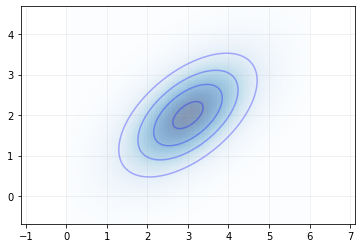

In [2]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

### Question 3 - Heavy Tailed Distributions and the Exponential Distribution (16 points)

### Heavy Tailed Distributions

Recall the definition of Heavy Tailed distribution from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

Does the standard log-normal distribution have a heavy right tail? prove your answer.

### Special Properties of the Exponential Distribution

Let $X_1 \sim exp(\lambda_1)$ and $X_2 \sim exp(\lambda_2)$ be two independent exponential random variables.

Calculate $P(X_1 < X_2)$.

Let $ X_1 \sim \text{Exp}(\lambda_1) $ and $ X_2 \sim \text{Exp}(\lambda_2) $ be two independent exponential random variables.

We are tasked with calculating $ P(X_1 < X_2) $.

### Step 1: Definition of Exponential Distribution

For an exponential random variable $ X \sim \text{Exp}(\lambda) $, the probability density function (PDF) is:

$$
f_X(x) = \lambda e^{-\lambda x}, \quad x \geq 0.
$$

The cumulative distribution function (CDF) is:

$$
F_X(x) = 1 - e^{-\lambda x}, \quad x \geq 0.
$$

### Step 2: Probability Calculation

We are interested in $ P(X_1 < X_2) $. Using the joint distribution of $ X_1 $ and $ X_2 $, the probability can be expressed as:

$$
P(X_1 < X_2) = \int_0^\infty P(X_1 < x_2) f_{X_2}(x_2) \, dx_2.
$$

Here, $ P(X_1 < x_2) = F_{X_1}(x_2) $, which is the CDF of $ X_1 $, and $ f_{X_2}(x_2) $ is the PDF of $ X_2 $. Therefore:

$$
P(X_1 < X_2) = \int_0^\infty (1 - e^{-\lambda_1 x_2}) \lambda_2 e^{-\lambda_2 x_2} \, dx_2.
$$

### Step 3: Simplifying the Integral

Breaking the integral into two parts:

$$
P(X_1 < X_2) = \int_0^\infty \lambda_2 e^{-\lambda_2 x_2} \, dx_2 - \int_0^\infty \lambda_2 e^{-\lambda_1 x_2} e^{-\lambda_2 x_2} \, dx_2.
$$

The first integral is straightforward:

$$
\int_0^\infty \lambda_2 e^{-\lambda_2 x_2} \, dx_2 = 1.
$$

The second integral becomes:

$$
\int_0^\infty \lambda_2 e^{-(\lambda_1 + \lambda_2) x_2} \, dx_2 = \frac{\lambda_2}{\lambda_1 + \lambda_2}.
$$

### Step 4: Final Expression

Thus, we have:

$$
P(X_1 < X_2) = 1 - \frac{\lambda_2}{\lambda_1 + \lambda_2}.
$$

Simplifying this:

$$
P(X_1 < X_2) = \frac{\lambda_1}{\lambda_1 + \lambda_2}.
$$

### Conclusion:

The probability that $ X_1 < X_2 $ is:

$$
P(X_1 < X_2) = \frac{\lambda_1}{\lambda_1 + \lambda_2}.
$$

### Question 4 - CLT for Markov chains (16 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

In [29]:
import numpy as np

# Transition matrix
T = np.array([
    [0.4, 0.2, 0.1, 0.0, 0.1, 0.2],
    [0.2, 0.4, 0.2, 0.1, 0.0, 0.1],
    [0.1, 0.2, 0.4, 0.2, 0.1, 0.0],
    [0.0, 0.1, 0.2, 0.4, 0.2, 0.1],
    [0.1, 0.0, 0.1, 0.2, 0.4, 0.2],
    [0.2, 0.1, 0.0, 0.1, 0.2, 0.4],
])

# Solve for the stationary distribution: pi * T = pi
eigvals, eigvecs = np.linalg.eig(T.T)  # Transpose for left eigenvector
stationary = eigvecs[:, np.isclose(eigvals, 1)].flatten().real  # Eigenvector for eigenvalue 1
stationary /= stationary.sum()  # Normalize to sum to 1

# Calculate the expected value
states = np.arange(1, 7)  # Possible states: 1 to 6
expected_value = np.dot(states, stationary)

print(f"Stationary distribution: {stationary}")
print(f"Expected average value in the stationary state: {expected_value:.4f}")


Stationary distribution: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Expected average value in the stationary state: 3.5000


In [30]:
import matplotlib.pyplot as plt

# Function to simulate a single trajectory
def simulate_trajectory(T, length):
    states = np.arange(1, 7)  # Possible states: 1 to 6
    trajectory = np.zeros(length, dtype=int)
    
    # Initial state
    trajectory[0] = np.random.choice(states)
    
    # Generate the rest of the trajectory
    for i in range(1, length):
        current_state = trajectory[i - 1] - 1  # Convert to 0-indexed
        trajectory[i] = np.random.choice(states, p=T[current_state])
    
    return trajectory

def plot_trajectories(trajectory_averages, bins=20):

    # Plot the histogram
    plt.hist(trajectory_averages, bins=bins, edgecolor='black', alpha=0.75)
    plt.title('Histogram of Trajectory Averages')
    plt.xlabel('Average Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def process_trajectories(T, trajectory_length, num_trajectories):
    # Simulate all trajectories
    trajectories = np.array([simulate_trajectory(T, trajectory_length) for _ in range(num_trajectories)])
    
    # Calculate the average of each trajectory
    trajectory_averages = trajectories.mean(axis=1)

    return trajectory_averages

def process_and_plot_trajectories(T, trajectory_length, num_trajectories):

    trajectory_averages = process_trajectories(T, trajectory_length, num_trajectories)
    
    # Compute empirical mean and standard deviation
    empirical_mean = trajectory_averages.mean()
    empirical_std = trajectory_averages.std()

    print(f"trajectories_average: {empirical_mean:.4f}")
    plot_trajectories(trajectory_averages)
    
    return empirical_mean, empirical_std


trajectories_average: 3.4758


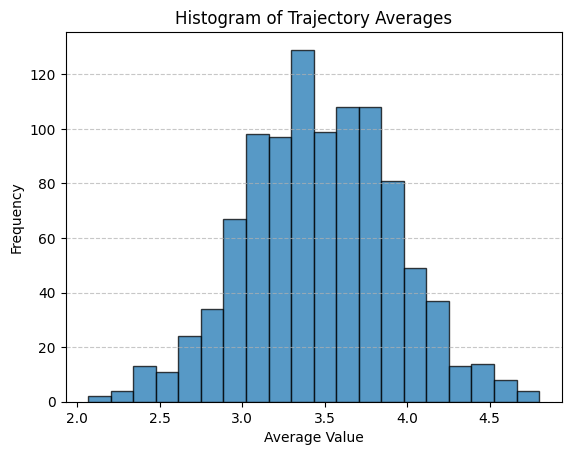

According to the Central Limit Theorem the distribution should look like a normal disribution
Empirical mean of trajectory averages: 3.4758
Empirical standard deviation of trajectory averages: 0.4560


In [31]:
# Use the extracted function
empirical_mean, empirical_std = process_and_plot_trajectories(
    T=T,
    trajectory_length=30,
    num_trajectories=1000
)

print(f"According to the Central Limit Theorem the distribution should look like a normal disribution")

print(f"Empirical mean of trajectory averages: {empirical_mean:.4f}")
print(f"Empirical standard deviation of trajectory averages: {empirical_std:.4f}")

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

In [32]:
print(f"We expect the avarage value to be same as the previous since we calculated it from the stationary state")

We expect the avarage value to be same as the previous since we calculated it from the stationary state


trajectories_average: 3.4935


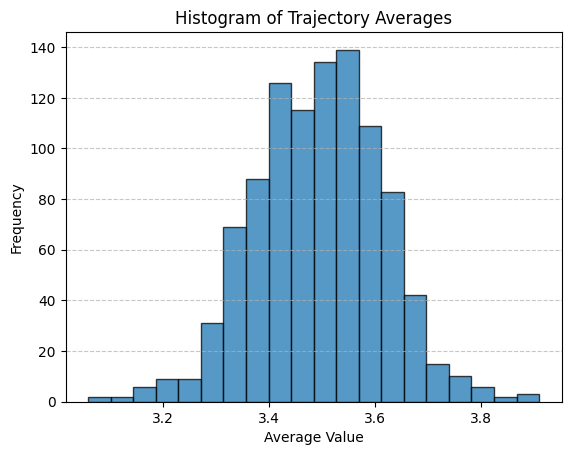

According to the Central Limit Theorem the distribution should look like a normal disribution
Empirical mean of trajectory averages: 3.4935
Empirical standard deviation of trajectory averages: 0.1205


In [33]:
# Use the extracted function
empirical_mean, empirical_std = process_and_plot_trajectories(
    T=T,
    trajectory_length=500,
    num_trajectories=1000
)

print(f"According to the Central Limit Theorem the distribution should look like a normal disribution")

print(f"Empirical mean of trajectory averages: {empirical_mean:.4f}")
print(f"Empirical standard deviation of trajectory averages: {empirical_std:.4f}")

#### 4.C
Draw normal fit curves on your two histograms.

In [ ]:
from scipy.stats import norm

def plot_normal_fit_curve(trajectory_averages, empirical_mean, empirical_std, bins=20):

    # Generate the x values for the normal fit curve
    x = np.linspace(trajectory_averages.min(), trajectory_averages.max(), 1000)
    y = norm.pdf(x, loc=empirical_mean, scale=empirical_std)
    
    # Plot the normal fit curve
    plt.plot(x, y, 'r-', label='Normal Fit', linewidth=2)
    plt.title('Histogram of Trajectory Averages with Normal Fit')
    plt.xlabel('Average Value')
    plt.ylabel('Density')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

plot_normal_fit_curve(trajectory_averages, empirical_mean, empirical_std)


#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

### Question 5 - Distributions (16 Points)

Let $X$ be a random variable. Consider the number $q$ so that $P(X\le q)=0.8$ (assume that such a value exists).

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Denote the sorted observations by: $a_1 \le a_2 \le ... \le a_n$. Also assume that $n \ge 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $a_i \le q$. If $a_1 > q$ then $R = 0$.

1. What is $P(R = 0)$?
1. What is the distribution of $R$?
1. Given $n$, write code that computes an index $\lambda (n)$ so that $P(a_{\lambda (n)} \le q) \ge 0.9$ and $P(a_{\lambda (n)+1} \le q) < 0.9$.
1. Let $X \sim Unif(0,1)$, $q$ as above and $n=100$. Compute $\lambda (n)$ as above. Run 200 experiments that calculate $a_{\lambda (n)}$ for independent drawing from $X$. How many times did you observe $a_{\lambda (n)} \le q$?